# Visualize và xử lý data

In [1]:
import shutil
import os

# Đường dẫn đến thư mục Von trong Google Drive đã mount
drive_path = "/content/sample_data"

# Kiểm tra xem thư mục có tồn tại không
if os.path.exists(drive_path) and os.path.isdir(drive_path):
    try:
        # Xóa thư mục và tất cả nội dung bên trong
        shutil.rmtree(drive_path)
        print(f"Đã xóa thành công thư mục: {drive_path}")
    except Exception as e:
        print(f"Lỗi khi xóa thư mục: {e}")

        # Nếu shutil.rmtree() không hoạt động, thử dùng lệnh shell
        print("Thử phương pháp thay thế...")
        !rm -rf "{drive_path}"

        # Kiểm tra lại sau khi xóa bằng lệnh shell
        if not os.path.exists(drive_path):
            print(f"Đã xóa thành công thư mục: {drive_path}")
        else:
            print("Không thể xóa thư mục. Vui lòng kiểm tra quyền truy cập.")
else:
    print(f"Thư mục {drive_path} không tồn tại")

# Kiểm tra dung lượng trống sau khi xóa
!df -h

Đã xóa thành công thư mục: /content/sample_data
Filesystem      Size  Used Avail Use% Mounted on
overlay         113G   38G   76G  33% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
tmpfs           6.4G  668K  6.4G   1% /var/colab
/dev/sda1       119G  115G  4.3G  97% /kaggle/input
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Chia nhỏ file data gốc

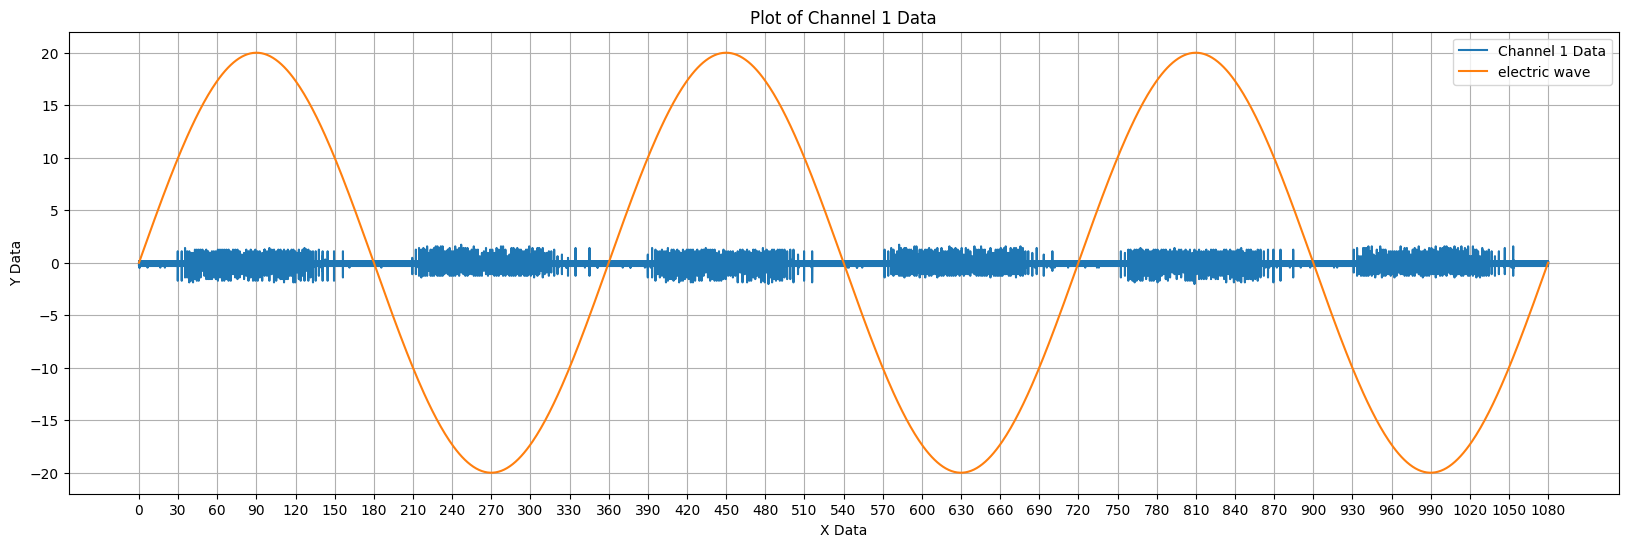

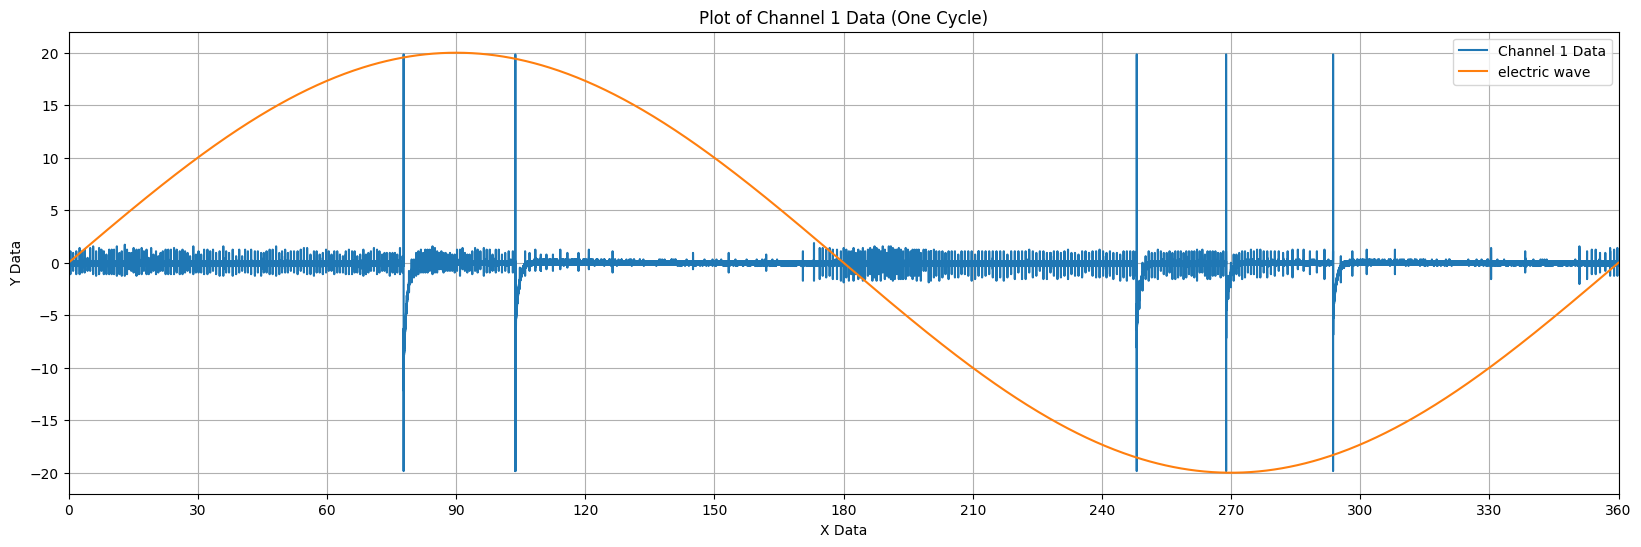

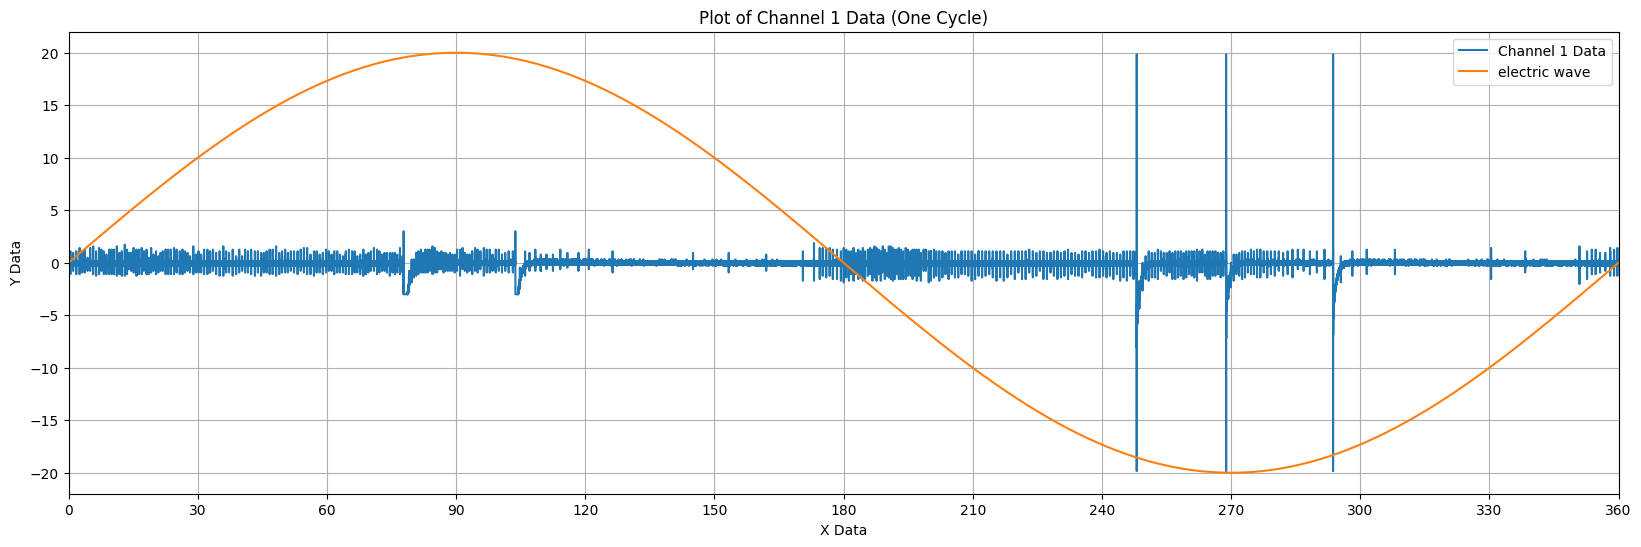

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Đường dẫn tới file HDF5 của bạn
hdf5_file_path = '/content/drive/MyDrive/adjust_data/'
file_name='adjust_0_file1.h5'

# Đọc dữ liệu từ file HDF5 bằng pandas
df = pd.read_hdf(hdf5_file_path + file_name, key='df')

# Giả sử 'x_data' là thời gian và 'y_data' là các tín hiệu
# Chuyển dữ liệu từ DataFrame sang numpy array
x_data = df['x_data'].values
y_data = df['y_data'].values
degree_values = np.linspace(0, 1080, 1000)
radian_values = np.deg2rad(degree_values)
sin_wave = 20*np.sin(radian_values)  # 3 chu kỳ

plt.figure(figsize=(20, 6))
plt.plot(x_data, y_data, label='Channel 1 Data')
plt.plot(degree_values, sin_wave, label='electric wave')

plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.title('Plot of Channel 1 Data')
plt.xticks(np.arange(0, 1081, 30))
plt.legend()
plt.grid(True)
plt.show()

hdf5_file_path = '/content/drive/MyDrive/adjust_data/'
file_name='adjust_1_file2.h5'

# Đọc dữ liệu từ file HDF5 bằng pandas
df = pd.read_hdf(hdf5_file_path + file_name, key='df')

# Giả sử 'x_data' là thời gian và 'y_data' là các tín hiệu
# Chuyển dữ liệu từ DataFrame sang numpy array
chunk_size = int(4800000/3)
x_data = df['x_data'].values[0:chunk_size]
y_data = df['y_data'].values[0:chunk_size]

# Tạo sóng sin cho 1 chu kỳ (0 đến 360 độ)
degree_values = np.linspace(0, 360, 1000)  # 1 chu kỳ
radian_values = np.deg2rad(degree_values)
sin_wave = 20 * np.sin(radian_values)

plt.figure(figsize=(20, 6))
plt.plot(x_data, y_data, label='Channel 1 Data')
plt.plot(degree_values, sin_wave, label='electric wave')

plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.title('Plot of Channel 1 Data (One Cycle)')
plt.xlim(0, 360)  # Set x-axis limits to cover one full cycle
plt.xticks(np.arange(0, 361, 30))
plt.legend()
plt.grid(True)
plt.show()


hdf5_file_path = '/content/drive/MyDrive/adjust_data/'
file_name='adjust_2_file2.h5'

# Đọc dữ liệu từ file HDF5 bằng pandas
df = pd.read_hdf(hdf5_file_path + file_name, key='df')

# Giả sử 'x_data' là thời gian và 'y_data' là các tín hiệu
# Chuyển dữ liệu từ DataFrame sang numpy array
chunk_size = int(4800000/3)
x_data = df['x_data'].values[0:chunk_size]
y_data = df['y_data'].values[0:chunk_size]

# Tạo sóng sin cho 1 chu kỳ (0 đến 360 độ)
degree_values = np.linspace(0, 360, 1000)  # 1 chu kỳ
radian_values = np.deg2rad(degree_values)
sin_wave = 20 * np.sin(radian_values)

plt.figure(figsize=(20, 6))
plt.plot(x_data, y_data, label='Channel 1 Data')
plt.plot(degree_values, sin_wave, label='electric wave')

plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.title('Plot of Channel 1 Data (One Cycle)')
plt.xlim(0, 360)  # Set x-axis limits to cover one full cycle
plt.xticks(np.arange(0, 361, 30))
plt.legend()
plt.grid(True)
plt.show()

In [5]:
'''
Do các file có tính cho kỳ, có thể chia là 3 chu kì nhỏ hơn nên có thể cắt nhỏ file thành 3 phần bằng nhau.
Dưới đây là đoạn code cắt nhỏ file thành 3 phần.
'''
import os
import pandas as pd
import numpy as np

# Định nghĩa kích thước của mỗi phần
chunk_size = int(4800000 / 3)  # Kích thước mỗi chunk

# Đường dẫn tới thư mục chứa các file HDF5
input_dir = '/content/drive/MyDrive/adjust_data/'
output_dir = '/content/drive/MyDrive/Von/'
os.makedirs(output_dir, exist_ok=True)

# Lặp qua tất cả các file HDF5 trong thư mục nguồn
for file_name in os.listdir(input_dir):
    if file_name.endswith('.h5'):
        file_path = os.path.join(input_dir, file_name)

        # Đọc dữ liệu từ file HDF5 bằng pandas
        df = pd.read_hdf(file_path, key='df')

        # Chuyển dữ liệu từ DataFrame sang numpy array
        x_data = df['x_data'].values
        y_data = df['y_data'].values

        # Xác định số lượng phần dựa trên kích thước của chunk_size
        num_chunks = len(x_data) // chunk_size + (1 if len(x_data) % chunk_size != 0 else 0)

        # Cắt dữ liệu và lưu vào các file nhỏ
        for i in range(num_chunks):
            start_idx = i * chunk_size
            end_idx = min((i + 1) * chunk_size, len(x_data))

            # Cắt dữ liệu
            x_data_segment = x_data[start_idx:end_idx]
            y_data_segment = y_data[start_idx:end_idx]

            # Tạo DataFrame cho phần dữ liệu
            segment_df = pd.DataFrame({'x_data': x_data_segment, 'y_data': y_data_segment})

            # Tạo tên file mới
            base_name, ext = os.path.splitext(file_name)
            segment_file_name = f'{base_name}_chunk_{i}{ext}'
            segment_file_path = os.path.join(output_dir, segment_file_name)

            # Lưu vào file HDF5
            segment_df.to_hdf(segment_file_path, key='df', mode='w')

            print(f"Lưu phần dữ liệu {i} vào {segment_file_name}")


Lưu phần dữ liệu 0 vào adjust_0_file10_chunk_0.h5
Lưu phần dữ liệu 1 vào adjust_0_file10_chunk_1.h5
Lưu phần dữ liệu 2 vào adjust_0_file10_chunk_2.h5
Lưu phần dữ liệu 0 vào adjust_0_file1_chunk_0.h5
Lưu phần dữ liệu 1 vào adjust_0_file1_chunk_1.h5
Lưu phần dữ liệu 2 vào adjust_0_file1_chunk_2.h5
Lưu phần dữ liệu 0 vào adjust_0_file8_chunk_0.h5
Lưu phần dữ liệu 1 vào adjust_0_file8_chunk_1.h5
Lưu phần dữ liệu 2 vào adjust_0_file8_chunk_2.h5
Lưu phần dữ liệu 0 vào adjust_0_file3_chunk_0.h5
Lưu phần dữ liệu 1 vào adjust_0_file3_chunk_1.h5
Lưu phần dữ liệu 2 vào adjust_0_file3_chunk_2.h5
Lưu phần dữ liệu 0 vào adjust_0_file7_chunk_0.h5
Lưu phần dữ liệu 1 vào adjust_0_file7_chunk_1.h5
Lưu phần dữ liệu 2 vào adjust_0_file7_chunk_2.h5
Lưu phần dữ liệu 0 vào adjust_0_file4_chunk_0.h5
Lưu phần dữ liệu 1 vào adjust_0_file4_chunk_1.h5
Lưu phần dữ liệu 2 vào adjust_0_file4_chunk_2.h5
Lưu phần dữ liệu 0 vào adjust_0_file2_chunk_0.h5
Lưu phần dữ liệu 1 vào adjust_0_file2_chunk_1.h5
Lưu phần dữ liệu 

In [6]:
import shutil
import os

# Đường dẫn đến thư mục Von trong Google Drive đã mount
drive_path = "/content/drive/MyDrive/adjust_data"

# Kiểm tra xem thư mục có tồn tại không
if os.path.exists(drive_path) and os.path.isdir(drive_path):
    try:
        # Xóa thư mục và tất cả nội dung bên trong
        shutil.rmtree(drive_path)
        print(f"Đã xóa thành công thư mục: {drive_path}")
    except Exception as e:
        print(f"Lỗi khi xóa thư mục: {e}")

        # Nếu shutil.rmtree() không hoạt động, thử dùng lệnh shell
        print("Thử phương pháp thay thế...")
        !rm -rf "{drive_path}"

        # Kiểm tra lại sau khi xóa bằng lệnh shell
        if not os.path.exists(drive_path):
            print(f"Đã xóa thành công thư mục: {drive_path}")
        else:
            print("Không thể xóa thư mục. Vui lòng kiểm tra quyền truy cập.")
else:
    print(f"Thư mục {drive_path} không tồn tại")

# Kiểm tra dung lượng trống sau khi xóa
!df -h

Đã xóa thành công thư mục: /content/drive/MyDrive/adjust_data
Filesystem      Size  Used Avail Use% Mounted on
overlay         113G   52G   62G  46% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
tmpfs           6.4G  896K  6.4G   1% /var/colab
/dev/sda1       119G  115G  4.3G  97% /kaggle/input
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G   15G     0 100% /content/drive


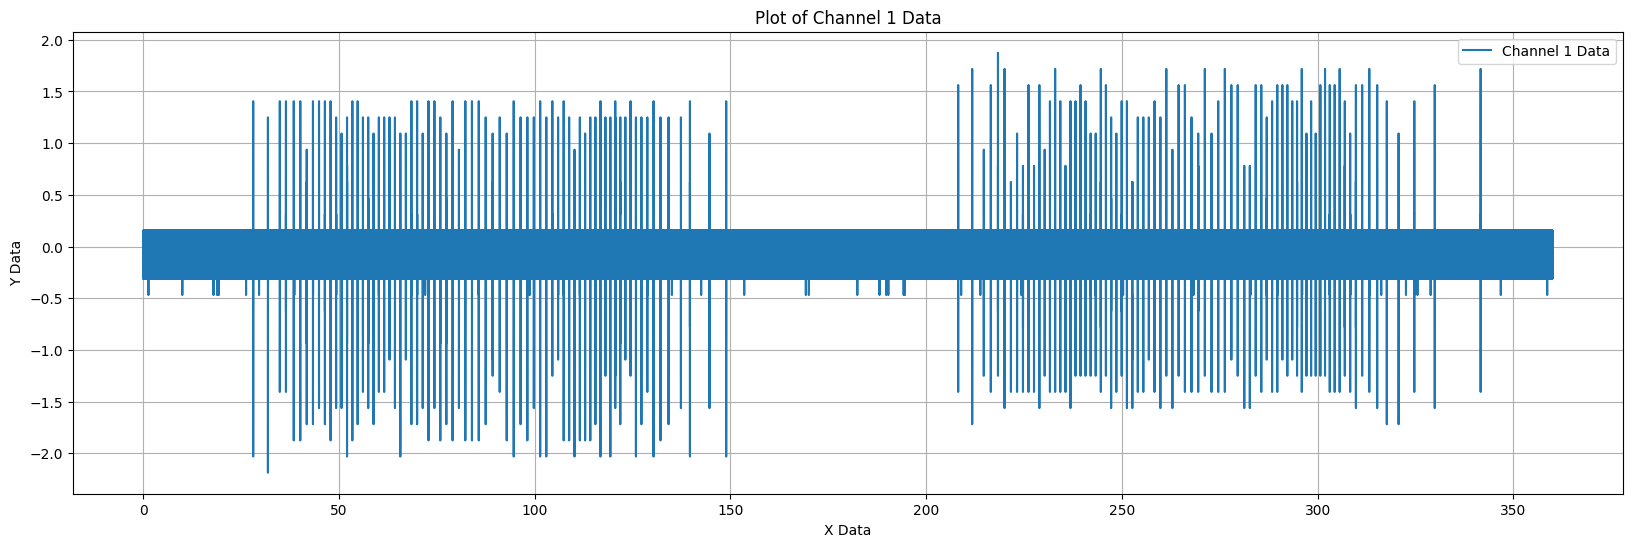

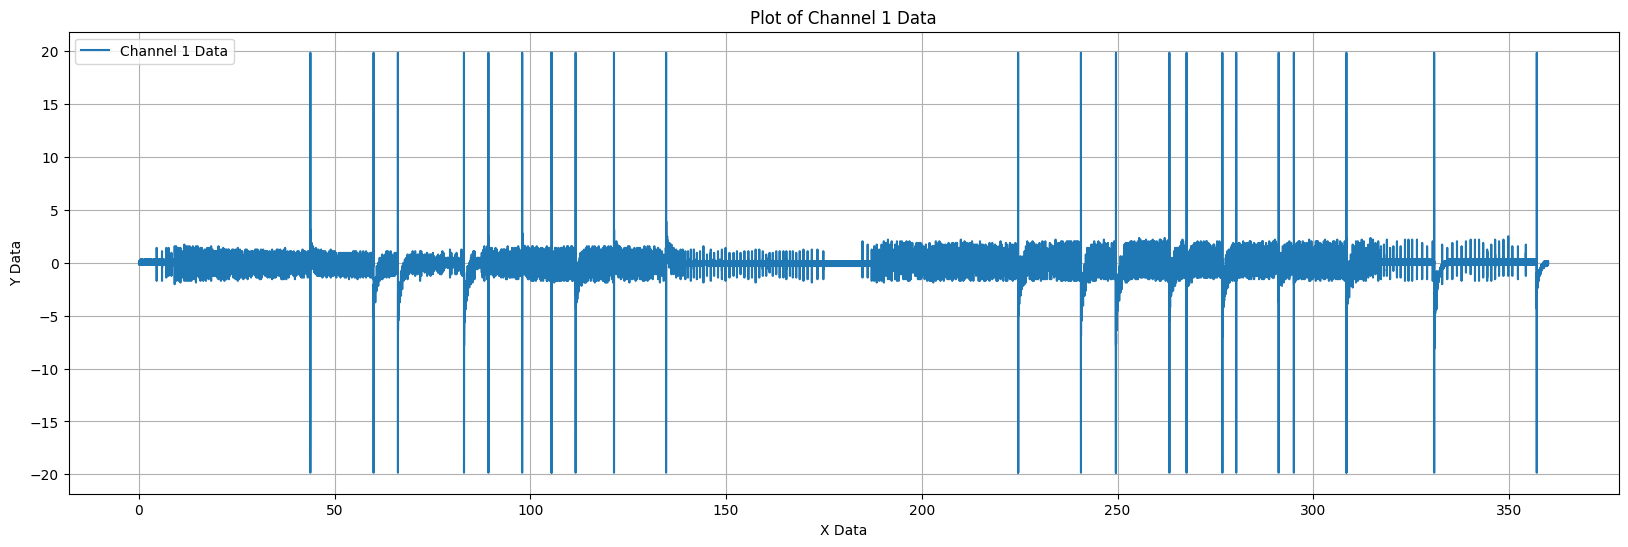

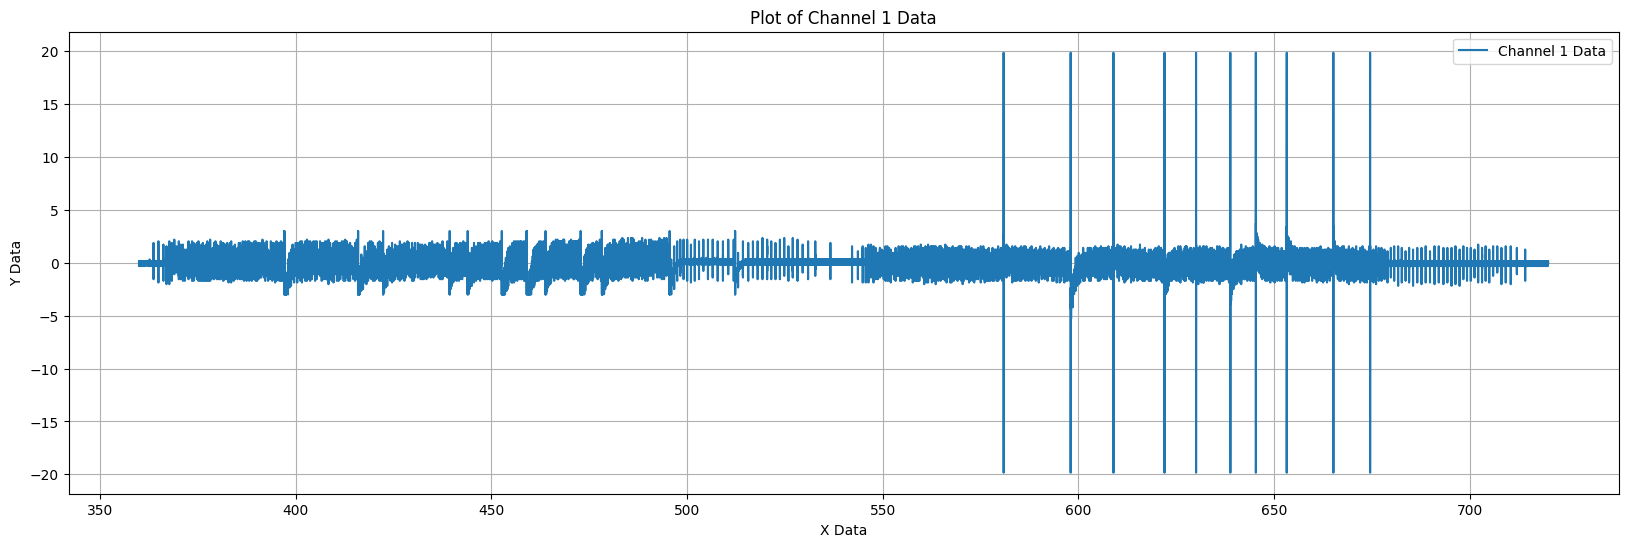

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đường dẫn tới file HDF5 của bạn
hdf5_file_path = '/content/drive/MyDrive/Von/'
file_name = 'adjust_0_file6_chunk_0.h5'

# Đọc dữ liệu từ file HDF5 bằng pandas
df = pd.read_hdf(hdf5_file_path + file_name, key='df')

# Giả sử 'x_data' là thời gian và 'y_data' là các tín hiệu
# Chuyển dữ liệu từ DataFrame sang numpy array
x_data = df['x_data'].values
y_data = df['y_data'].values

# Vẽ biểu đồ
plt.figure(figsize=(20, 6))
plt.plot(x_data, y_data, label='Channel 1 Data')

plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.title('Plot of Channel 1 Data')
plt.legend()
plt.grid(True)
plt.show()

# Đường dẫn tới file HDF5 của bạn
hdf5_file_path = '/content/drive/MyDrive/Von/'
file_name = 'adjust_1_file15_chunk_0.h5'

# Đọc dữ liệu từ file HDF5 bằng pandas
df = pd.read_hdf(hdf5_file_path + file_name, key='df')

# Giả sử 'x_data' là thời gian và 'y_data' là các tín hiệu
# Chuyển dữ liệu từ DataFrame sang numpy array
x_data = df['x_data'].values
y_data = df['y_data'].values

# Vẽ biểu đồ
plt.figure(figsize=(20, 6))
plt.plot(x_data, y_data, label='Channel 1 Data')

plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.title('Plot of Channel 1 Data')
plt.legend()
plt.grid(True)
plt.show()

# Đường dẫn tới file HDF5 của bạn
hdf5_file_path = '/content/drive/MyDrive/Von/'
file_name = 'adjust_2_file16_chunk_1.h5'

# Đọc dữ liệu từ file HDF5 bằng pandas
df = pd.read_hdf(hdf5_file_path + file_name, key='df')

# Giả sử 'x_data' là thời gian và 'y_data' là các tín hiệu
# Chuyển dữ liệu từ DataFrame sang numpy array
x_data = df['x_data'].values
y_data = df['y_data'].values

# Vẽ biểu đồ
plt.figure(figsize=(20, 6))
plt.plot(x_data, y_data, label='Channel 1 Data')

plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.title('Plot of Channel 1 Data')
plt.legend()
plt.grid(True)
plt.show()



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import gc  # Garbage collection module

# Define paths
data_dir = '/content/drive/MyDrive/Von/'
save_dir = '/content/drive/MyDrive/VonImage/'

# Create directory for saving images if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

def process_file(file_name):
    if file_name.endswith('.h5'):
        # Full path to the file
        file_path = os.path.join(data_dir, file_name)

        try:
            # Read data from HDF5 file
            df = pd.read_hdf(file_path)

            # Convert DataFrame columns to numpy arrays
            x_data = df['x_data'].values
            y_data = df['y_data'].values

            # Create a new figure without displaying it
            plt.ioff()  # Turn off interactive plotting
            plt.figure(figsize=(20, 6))

            # Plot the data
            plt.plot(x_data, y_data, label='Channel 1 Data')

            # Remove axis labels and gridlines
            plt.axis('off')  # Hide both x and y axes

            # Define the path for saving the image
            base_name = os.path.splitext(file_name)[0]
            save_path = os.path.join(save_dir, f'{base_name}.png')

            # Save the plot as an image file
            plt.savefig(save_path, bbox_inches='tight', pad_inches=0)

            # Close the plot to avoid memory issues
            plt.close()

            # Delete variables to free up memory
            del x_data, y_data, df

            # Manually trigger garbage collection
            gc.collect()

        except Exception as e:
            # Log the error and add the file to the failed list
            print(f"Failed to read or process {file_name}: {e}")

# Use list comprehension to process all files
_ = [process_file(file_name) for file_name in os.listdir(data_dir)]


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Đường dẫn tệp HDF5 đầu vào
in_path = "/content/drive/MyDrive/Von/adjust_0_file10_chunk_0.h5"

# Đọc dữ liệu từ file HDF5 bằng pandas
df = pd.read_hdf(in_path, key='df')

# Giả sử 'x_data' là thời gian và 'y_data' là các tín hiệu
# Chuyển dữ liệu từ DataFrame sang numpy array
x_data = df['x_data'].values
y_data = df['y_data'].values

# Đặt toàn bộ y_data bằng 0
y_data = np.zeros_like(y_data)

# Chạy vòng lặp 500 lần với std_dev ngẫu nhiên từ 0.1 đến 4.0
for i in range(500):
    print(i)
    # Tạo std_dev ngẫu nhiên từ 0.1 đến 4.0
    std_dev = random.uniform(0.1, 4.0)
    mean=0
    # Tạo Gaussian noise với std_dev ngẫu nhiên
    noise = np.random.normal(mean, std_dev, size=y_data.shape)

    # Cộng noise vào dữ liệu y_data đã được đặt bằng 0
    y_data_noisy = y_data + noise

    # Tạo plot không hiển thị
    plt.ioff()  # Tắt chế độ hiển thị tương tác
    plt.figure(figsize=(10, 3))

    # Vẽ dữ liệu
    plt.plot(x_data, y_data_noisy, label='Channel 1 Data')

    # Ẩn các nhãn trục và lưới
    plt.axis('off')  # Ẩn cả hai trục x và y

    # Đường dẫn để lưu hình ảnh
    save_path = os.path.join("/content/drive/MyDrive/VonImage/", f'adjust_3_file1_chunk_{i}_std_dev_{std_dev:.1f}.png')

    # Lưu plot dưới dạng tệp hình ảnh
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)

    # Đóng plot để tránh các vấn đề về bộ nhớ
    plt.close()



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [10]:
!ls /content/drive/MyDrive/VonImage/adjust_3* | wc -l


500


In [11]:
!rm -rf /content/drive/MyDrive/VonImage/adjust_3_file1_chunk_0_std_dev_10.0.png

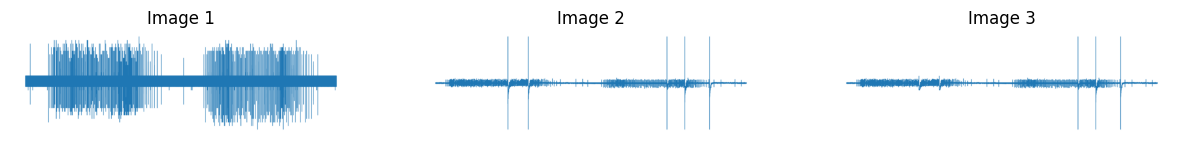

In [12]:
import matplotlib.pyplot as plt
from PIL import Image

# Load the images
image1 = Image.open("/content/drive/MyDrive/VonImage/adjust_0_file24_chunk_1.png")
image2 = Image.open("/content/drive/MyDrive/VonImage/adjust_1_file24_chunk_1.png")
image3 = Image.open("/content/drive/MyDrive/VonImage/adjust_2_file24_chunk_1.png")

# Display the images
plt.figure(figsize=(15, 5))

# Display first image
plt.subplot(1, 3, 1)
plt.imshow(image1)
plt.axis('off')
plt.title('Image 1')

# Display second image
plt.subplot(1, 3, 2)
plt.imshow(image2)
plt.axis('off')
plt.title('Image 2')

# Display third image
plt.subplot(1, 3, 3)
plt.imshow(image3)
plt.axis('off')
plt.title('Image 3')

plt.show()


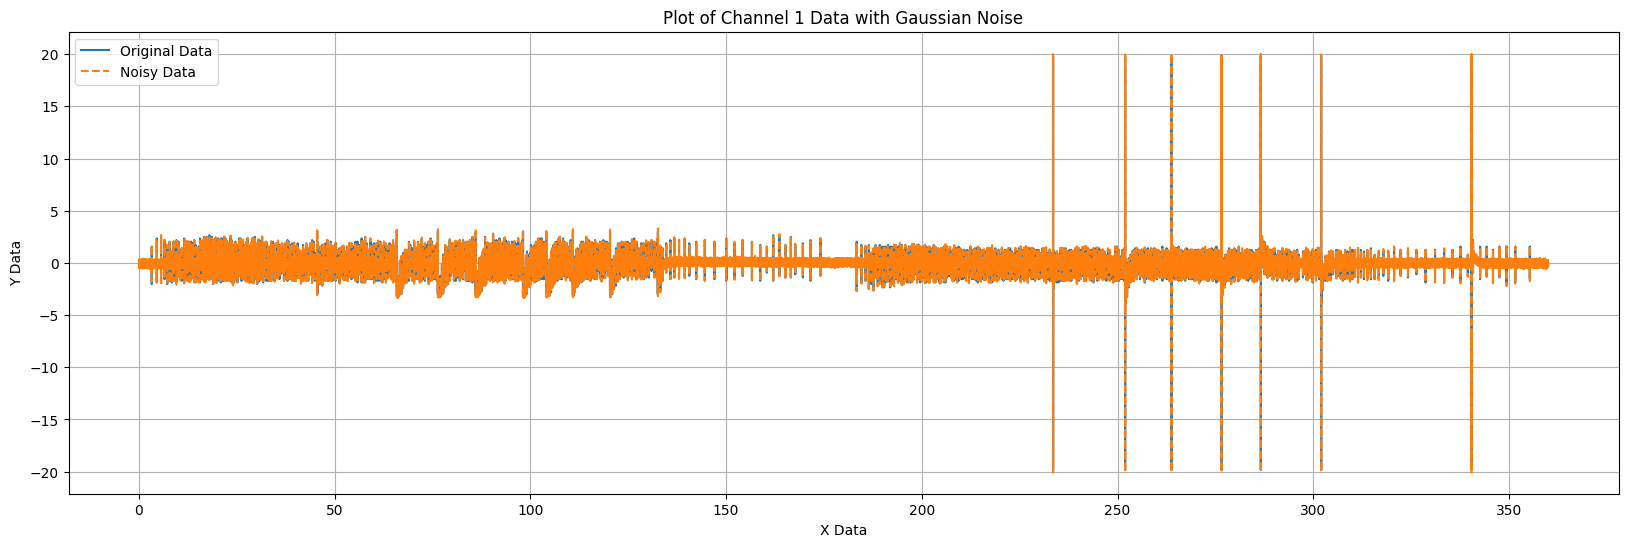

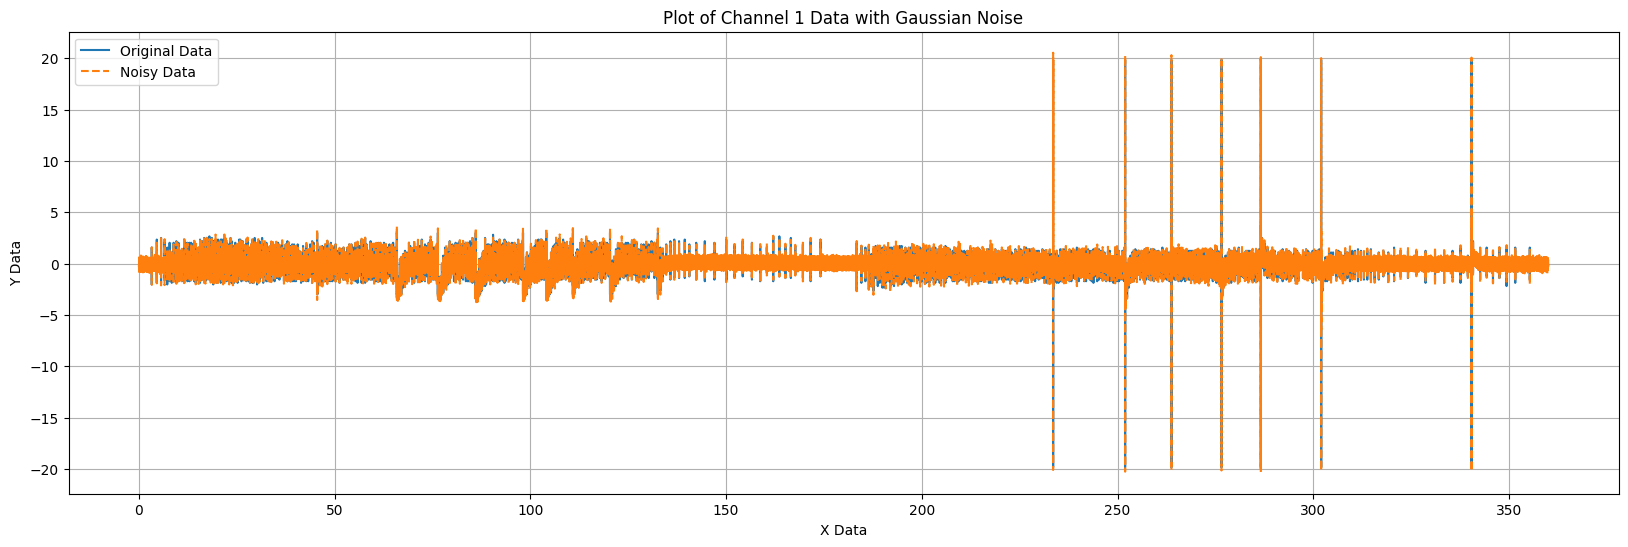

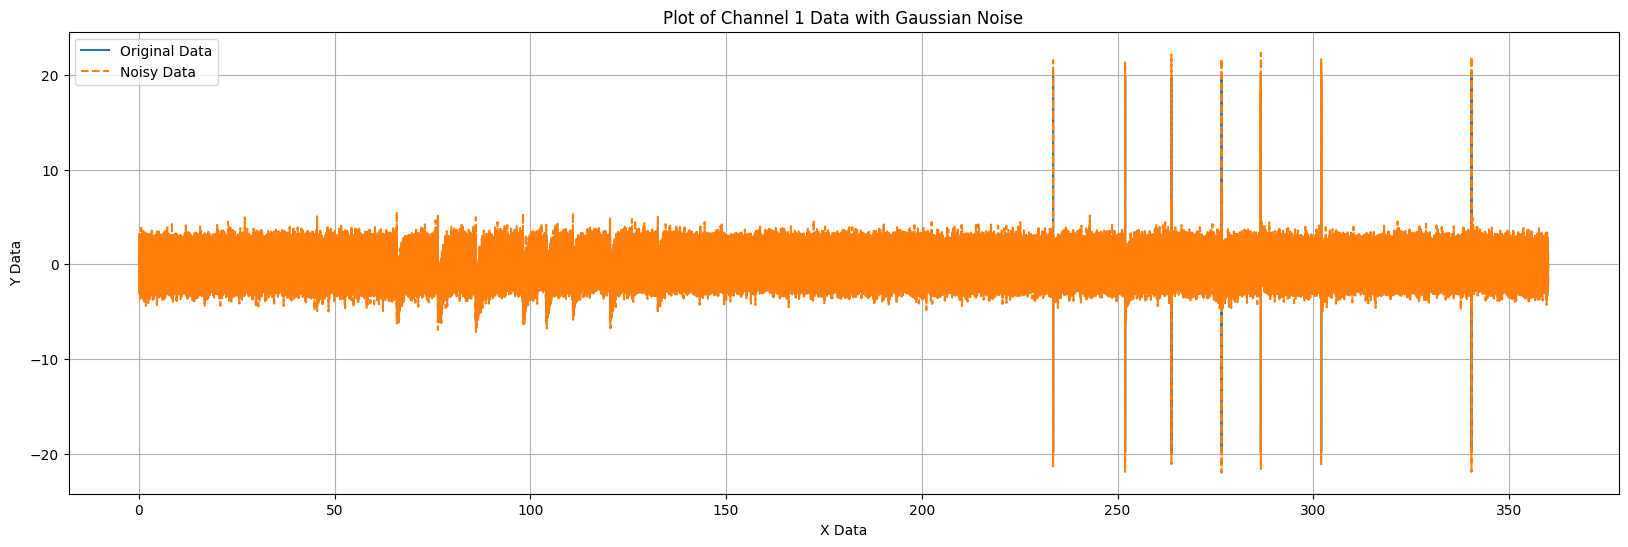

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đường dẫn tới file HDF5 của bạn
hdf5_file_path = '/content/drive/MyDrive/Von/'
file_name = 'adjust_2_file6_chunk_0.h5'

# Đọc dữ liệu từ file HDF5 bằng pandas
df = pd.read_hdf(hdf5_file_path + file_name, key='df')

# Giả sử 'x_data' là thời gian và 'y_data' là các tín hiệu
# Chuyển dữ liệu từ DataFrame sang numpy array
x_data = df['x_data'].values
y_data = df['y_data'].values

# Thêm Gaussian noise vào y_data
mean = 0          # Trung bình của phân phối Gaussian
std_dev = 0.1     # Độ lệch chuẩn của phân phối Gaussian

# Tạo Gaussian noise
noise = np.random.normal(mean, std_dev, size=y_data.shape)

# Cộng noise vào dữ liệu
y_data_noisy = y_data + noise

# Vẽ biểu đồ
plt.figure(figsize=(20, 6))
plt.plot(x_data, y_data, label='Original Data')
plt.plot(x_data, y_data_noisy, label='Noisy Data', linestyle='--')

plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.title('Plot of Channel 1 Data with Gaussian Noise')
plt.legend()
plt.grid(True)
plt.show()

# Đọc dữ liệu từ file HDF5 bằng pandas
df = pd.read_hdf(hdf5_file_path + file_name, key='df')

# Giả sử 'x_data' là thời gian và 'y_data' là các tín hiệu
# Chuyển dữ liệu từ DataFrame sang numpy array
x_data = df['x_data'].values
y_data = df['y_data'].values

# Thêm Gaussian noise vào y_data
mean = 0          # Trung bình của phân phối Gaussian
std_dev = 0.2     # Độ lệch chuẩn của phân phối Gaussian

# Tạo Gaussian noise
noise = np.random.normal(mean, std_dev, size=y_data.shape)

# Cộng noise vào dữ liệu
y_data_noisy = y_data + noise

# Vẽ biểu đồ
plt.figure(figsize=(20, 6))
plt.plot(x_data, y_data, label='Original Data')
plt.plot(x_data, y_data_noisy, label='Noisy Data', linestyle='--')

plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.title('Plot of Channel 1 Data with Gaussian Noise')
plt.legend()
plt.grid(True)
plt.show()


# Đọc dữ liệu từ file HDF5 bằng pandas
df = pd.read_hdf(hdf5_file_path + file_name, key='df')

# Giả sử 'x_data' là thời gian và 'y_data' là các tín hiệu
# Chuyển dữ liệu từ DataFrame sang numpy array
x_data = df['x_data'].values
y_data = df['y_data'].values

# Thêm Gaussian noise vào y_data
mean = 0          # Trung bình của phân phối Gaussian
std_dev = 1     # Độ lệch chuẩn của phân phối Gaussian

# Tạo Gaussian noise
noise = np.random.normal(mean, std_dev, size=y_data.shape)

# Cộng noise vào dữ liệu
y_data_noisy = y_data + noise

# Vẽ biểu đồ
plt.figure(figsize=(20, 6))
plt.plot(x_data, y_data, label='Original Data')
plt.plot(x_data, y_data_noisy, label='Noisy Data', linestyle='--')

plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.title('Plot of Channel 1 Data with Gaussian Noise')
plt.legend()
plt.grid(True)
plt.show()

##Thêm nhiễu và giải nhiễu

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def add_noise(in_path, out_path, mean=0, std_dev=10 ):


  # Đọc dữ liệu từ file HDF5 bằng pandas
  df = pd.read_hdf(in_path, key='df')

  # Giả sử 'x_data' là thời gian và 'y_data' là các tín hiệu
  # Chuyển dữ liệu từ DataFrame sang numpy array
  x_data = df['x_data'].values
  y_data = df['y_data'].values
  print(len(x_data))


  # Tạo Gaussian noise
  noise = np.random.normal(mean, std_dev, size=y_data.shape)

  # Cộng noise vào dữ liệu
  y_data_noisy = y_data + noise

  # Tạo DataFrame mới với dữ liệu đã thêm noise
  df_noisy = pd.DataFrame({'x_data': x_data, 'y_data': y_data_noisy})



  # Lưu DataFrame với dữ liệu đã thêm noise vào file HDF5 mới
  df_noisy.to_hdf(out_path, key='df', mode='w')

  print(f'Dữ liệu đã được lưu vào file {out_path}')
add_noise(in_path='/content/drive/MyDrive/Von/adjust_0_file10_chunk_0.h5', out_path="/content/adjust_0_file10_chunk_0_noisy.h5", std_dev=10)
add_noise(in_path='/content/drive/MyDrive/Von/adjust_1_file10_chunk_0.h5', out_path="/content/adjust_1_file10_chunk_0_noisy.h5", std_dev=10)
add_noise(in_path='/content/drive/MyDrive/Von/adjust_2_file10_chunk_0.h5', out_path="/content/adjust_2_file10_chunk_0_noisy.h5", std_dev=10)

1600000
Dữ liệu đã được lưu vào file /content/adjust_0_file10_chunk_0_noisy.h5
1600000
Dữ liệu đã được lưu vào file /content/adjust_1_file10_chunk_0_noisy.h5
1600000
Dữ liệu đã được lưu vào file /content/adjust_2_file10_chunk_0_noisy.h5


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt



def filter_noise(path):
  # Đọc dữ liệu từ file HDF5
  df_noisy = pd.read_hdf(path, key='df')

  # Chuyển dữ liệu từ DataFrame sang numpy array
  x_data = df_noisy['x_data'][:1600000].values
  y_data_noisy = df_noisy['y_data'][:1600000].values

  # Áp dụng bộ lọc thông thấp (Low-pass Filter) để khử nhiễu
  def low_pass_filter(data, cutoff_freq, fs, order=4):
      nyquist = 0.5 * fs
      normal_cutoff = cutoff_freq / nyquist
      b, a = butter(order, normal_cutoff, btype='low', analog=False)
      filtered_data = filtfilt(b, a, data)
      return filtered_data

  # Tần số mẫu (sample rate)
  fs = 1 / np.mean(np.diff(x_data))
  cutoff_freq = 0.1 * fs  # Tần số cắt (có thể điều chỉnh tùy thuộc vào dữ liệu của bạn)

  # Lọc dữ liệu nhiễu
  y_data_filtered = low_pass_filter(y_data_noisy, cutoff_freq, fs)

  # Hiển thị kết quả
  plt.figure(figsize=(20, 6))
  plt.plot(x_data, y_data_noisy, label='Noisy Data', linestyle='--')
  plt.plot(x_data, y_data_filtered, label='Filtered Data', linestyle='-.')
  plt.xlabel('X Data')
  plt.ylabel('Y Data')
  plt.title('Plot of Noisy Data and Filtered Data')
  plt.legend()
  plt.grid(True)
  plt.show()



In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import os

def filter_noise(path):
    # Đọc dữ liệu từ file HDF5
    df_noisy = pd.read_hdf(path, key='df')

    # Chuyển dữ liệu từ DataFrame sang numpy array
    x_data = df_noisy['x_data'][:1600000].values
    y_data_noisy = df_noisy['y_data'][:1600000].values

    # Áp dụng bộ lọc thông thấp (Low-pass Filter) để khử nhiễu
    def low_pass_filter(data, cutoff_freq, fs, order=4):
        nyquist = 0.5 * fs
        normal_cutoff = cutoff_freq / nyquist
        b, a = butter(order, normal_cutoff, btype='low', analog=False)
        filtered_data = filtfilt(b, a, data)
        return filtered_data

    # Tần số mẫu (sample rate)
    fs = 1 / np.mean(np.diff(x_data))
    cutoff_freq = 0.1 * fs  # Tần số cắt (có thể điều chỉnh tùy thuộc vào dữ liệu của bạn)

    # Lọc dữ liệu nhiễu
    y_data_filtered = low_pass_filter(y_data_noisy, cutoff_freq, fs)

    # Lưu dữ liệu nhiễu (Noisy Data)
    plt.figure(figsize=(10, 3))
    plt.plot(x_data, y_data_noisy, label='Noisy Data', linestyle='-', color='blue')
    plt.axis('off')
    noisy_image_path = os.path.splitext(path)[0] + '_noisy.png'
    plt.savefig(noisy_image_path, bbox_inches='tight', pad_inches=0)
    plt.close()

    # Lưu dữ liệu đã lọc (Filtered Data)
    plt.figure(figsize=(10, 3))
    plt.plot(x_data, y_data_filtered, label='Filtered Data', linestyle='-', color='green')
    plt.axis('off')
    filtered_image_path = os.path.splitext(path)[0] + '_filtered.png'
    plt.savefig(filtered_image_path, bbox_inches='tight', pad_inches=0)
    plt.close()

    print(f"Saved noisy image as {noisy_image_path}")
    print(f"Saved filtered image as {filtered_image_path}")

# Gọi hàm filter_noise cho các file
filter_noise("/content/adjust_0_file10_chunk_0_noisy.h5")
filter_noise("/content/adjust_1_file10_chunk_0_noisy.h5")
filter_noise("/content/adjust_2_file10_chunk_0_noisy.h5")


Saved noisy image as /content/adjust_0_file10_chunk_0_noisy_noisy.png
Saved filtered image as /content/adjust_0_file10_chunk_0_noisy_filtered.png
Saved noisy image as /content/adjust_1_file10_chunk_0_noisy_noisy.png
Saved filtered image as /content/adjust_1_file10_chunk_0_noisy_filtered.png
Saved noisy image as /content/adjust_2_file10_chunk_0_noisy_noisy.png
Saved filtered image as /content/adjust_2_file10_chunk_0_noisy_filtered.png


In [17]:
!rm -rf '/content/VonNoise/'
!mkdir '/content/VonNoise/'

In [18]:
!find /content/drive/MyDrive/VonImage1 -type f \( -iname '*.png' -o -iname '*.jpg' -o -iname '*.jpeg' \) | wc -l


find: ‘/content/drive/MyDrive/VonImage1’: No such file or directory
0


## Thêm nhiễu vào data, và lưu lại ảnh nhiễu làm dữ liệu cho quá trình train

In [20]:
import shutil
import os
from google.colab import files

!zip -r /content/VonImage_download.zip /content/drive/MyDrive/VonImage/
files.download('/content/VonImage_download.zip')

# Đường dẫn đến thư mục Von trong Google Drive đã mount
drive_path = "/content/drive/MyDrive/VonImage/"

# Kiểm tra xem thư mục có tồn tại không
if os.path.exists(drive_path) and os.path.isdir(drive_path):
    try:
        # Xóa thư mục và tất cả nội dung bên trong
        shutil.rmtree(drive_path)
        print(f"Đã xóa thành công thư mục: {drive_path}")
    except Exception as e:
        print(f"Lỗi khi xóa thư mục: {e}")

        # Nếu shutil.rmtree() không hoạt động, thử dùng lệnh shell
        print("Thử phương pháp thay thế...")
        !rm -rf "{drive_path}"

        # Kiểm tra lại sau khi xóa bằng lệnh shell
        if not os.path.exists(drive_path):
            print(f"Đã xóa thành công thư mục: {drive_path}")
        else:
            print("Không thể xóa thư mục. Vui lòng kiểm tra quyền truy cập.")
else:
    print(f"Thư mục {drive_path} không tồn tại")

# Kiểm tra dung lượng trống sau khi xóa
!df -h

  adding: content/drive/MyDrive/VonImage/ (stored 0%)
  adding: content/drive/MyDrive/VonImage/adjust_0_file10_chunk_0.png (deflated 6%)
  adding: content/drive/MyDrive/VonImage/adjust_0_file10_chunk_1.png (deflated 6%)
  adding: content/drive/MyDrive/VonImage/adjust_0_file10_chunk_2.png (deflated 6%)
  adding: content/drive/MyDrive/VonImage/adjust_0_file1_chunk_0.png (deflated 6%)
  adding: content/drive/MyDrive/VonImage/adjust_0_file1_chunk_1.png (deflated 6%)
  adding: content/drive/MyDrive/VonImage/adjust_0_file1_chunk_2.png (deflated 7%)
  adding: content/drive/MyDrive/VonImage/adjust_0_file8_chunk_0.png (deflated 6%)
  adding: content/drive/MyDrive/VonImage/adjust_0_file8_chunk_1.png (deflated 7%)
  adding: content/drive/MyDrive/VonImage/adjust_0_file8_chunk_2.png (deflated 7%)
  adding: content/drive/MyDrive/VonImage/adjust_0_file3_chunk_0.png (deflated 7%)
  adding: content/drive/MyDrive/VonImage/adjust_0_file3_chunk_1.png (deflated 5%)
  adding: content/drive/MyDrive/VonImage/

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Đã xóa thành công thư mục: /content/drive/MyDrive/VonImage/
Filesystem      Size  Used Avail Use% Mounted on
overlay         113G   88G   26G  78% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
tmpfs           6.4G  972K  6.4G   1% /var/colab
/dev/sda1       119G  115G  4.3G  97% /kaggle/input
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G   15G     0 100% /content/drive


### Thêm nhiễu Gausian vào sóng ban đầu

In [ ]:
import os
import pandas as pd
import numpy as np
import gc
import psutil  # For monitoring memory usage

hdf5_file_path = '/content/drive/MyDrive/Von/'
output_path = '/content/VonNoise/'

std_devs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

def print_memory_usage():
    mem = psutil.virtual_memory()
    print(f"RAM Usage: {mem.percent}% | Available: {mem.available / (1024 ** 3):.2f} GB | Used: {mem.used / (1024 ** 3):.2f} GB")

for file_name in os.listdir(hdf5_file_path):
    # Xử lý tất cả file adjust_0, adjust_1, adjust_2 với tất cả các chunk
    if file_name.endswith('.h5') and (file_name.startswith('adjust_0') or
                                        file_name.startswith('adjust_1') or
                                        file_name.startswith('adjust_2')):
        try:
            print(f"Processing file: {file_name}")
            # Attempt to read the HDF5 file
            df = pd.read_hdf(os.path.join(hdf5_file_path, file_name), key='df')
        except Exception as e:
            print(f"Error reading {file_name}: {e}")
            continue  # Skip to the next file if an error occurs

        x_data = df['x_data'].values
        y_data = df['y_data'].values

        for std_dev in std_devs:
            try:
                noise = np.random.normal(0, std_dev, size=y_data.shape)
                y_data_noisy = y_data + noise

                df['y_data'] = y_data_noisy

                output_file_name = f"{os.path.splitext(file_name)[0]}_std_dev_{std_dev}.h5"
                output_file_path = os.path.join(output_path, output_file_name)
                df.to_hdf(output_file_path, key='df', mode='w')

                del y_data_noisy, noise
                gc.collect()

                print_memory_usage()
            except Exception as e:
                print(f"Error processing {file_name} with std_dev {std_dev}: {e}")
                continue  # Skip to the next std_dev value if an error occurs

        del x_data, y_data, df
        gc.collect()

        print_memory_usage()

Processing file: adjust_0_file10_chunk_0.h5
RAM Usage: 58.0% | Available: 5.32 GB | Used: 7.04 GB
RAM Usage: 58.0% | Available: 5.33 GB | Used: 7.04 GB
RAM Usage: 58.0% | Available: 5.33 GB | Used: 7.03 GB
RAM Usage: 58.0% | Available: 5.33 GB | Used: 7.03 GB
RAM Usage: 58.0% | Available: 5.33 GB | Used: 7.03 GB
RAM Usage: 58.0% | Available: 5.33 GB | Used: 7.03 GB
RAM Usage: 58.0% | Available: 5.33 GB | Used: 7.04 GB
RAM Usage: 58.0% | Available: 5.32 GB | Used: 7.04 GB
RAM Usage: 58.0% | Available: 5.32 GB | Used: 7.04 GB
RAM Usage: 58.0% | Available: 5.32 GB | Used: 7.04 GB
RAM Usage: 58.0% | Available: 5.32 GB | Used: 7.04 GB
Processing file: adjust_0_file10_chunk_1.h5
RAM Usage: 58.0% | Available: 5.33 GB | Used: 7.03 GB
RAM Usage: 58.0% | Available: 5.33 GB | Used: 7.03 GB
RAM Usage: 58.0% | Available: 5.33 GB | Used: 7.03 GB
RAM Usage: 58.0% | Available: 5.33 GB | Used: 7.03 GB
RAM Usage: 58.0% | Available: 5.32 GB | Used: 7.04 GB
RAM Usage: 58.0% | Available: 5.33 GB | Used: 7.

### Chuyển sóng nhiễu sang hình ảnh

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc
import psutil  # For monitoring memory usage
import traceback  # Để ghi lại chi tiết lỗi

# Đường dẫn tới thư mục chứa các file HDF5
hdf5_file_path = '/content/VonNoise/'
output_path = '/content/drive/MyDrive/VonImage1/'

# Đảm bảo thư mục đầu ra tồn tại
os.makedirs(output_path, exist_ok=True)

# Hàm hiển thị thông tin RAM
def print_memory_usage():
    mem = psutil.virtual_memory()
    print(f"RAM Usage: {mem.percent}% | Available: {mem.available / (1024 ** 3):.2f} GB | Used: {mem.used / (1024 ** 3):.2f} GB")

# Đếm file đã xử lý
processed_count = 0
error_count = 0

# Lặp qua từng file trong thư mục
for file_name in os.listdir(hdf5_file_path):
    # Xử lý tất cả file adjust_0, adjust_1, adjust_2 với tất cả các chunk
    if file_name.endswith('.h5') and (file_name.startswith('adjust_0') or
                                    file_name.startswith('adjust_1') or
                                    file_name.startswith('adjust_2')):
        output_file_name = f"{os.path.splitext(file_name)[0]}.png"
        output_file_path = os.path.join(output_path, output_file_name)

        # Kiểm tra xem file ảnh đã tồn tại chưa
        if os.path.exists(output_file_path):
            print(f"File {output_file_name} already exists. Skipping...")
            continue

        print(f"Processing file: {file_name}")

        try:
            # Đọc dữ liệu từ file HDF5 bằng pandas
            file_path = os.path.join(hdf5_file_path, file_name)

            # Kiểm tra file tồn tại
            if not os.path.exists(file_path):
                print(f"File not found: {file_path}")
                error_count += 1
                continue

            # Đọc file với xử lý ngoại lệ
            try:
                df = pd.read_hdf(file_path, key='df')
            except Exception as e:
                print(f"Error reading HDF5 file {file_name}: {str(e)}")
                error_count += 1
                continue

            # Kiểm tra dữ liệu trong DataFrame
            if 'x_data' not in df.columns or 'y_data' not in df.columns:
                print(f"Required columns not found in {file_name}")
                error_count += 1
                continue

            # Chuyển dữ liệu từ DataFrame sang numpy array
            x_data = df['x_data'].values
            y_data = df['y_data'].values

            # Kiểm tra dữ liệu có trống không
            if len(x_data) == 0 or len(y_data) == 0:
                print(f"Empty data in {file_name}")
                error_count += 1
                continue

            # Kiểm tra và xử lý NaN hoặc Inf
            if np.isnan(x_data).any() or np.isnan(y_data).any() or np.isinf(x_data).any() or np.isinf(y_data).any():
                print(f"NaN or Inf values found in {file_name}, cleaning data...")
                mask = ~(np.isnan(x_data) | np.isnan(y_data) | np.isinf(x_data) | np.isinf(y_data))
                x_data = x_data[mask]
                y_data = y_data[mask]

                # Kiểm tra lại sau khi lọc
                if len(x_data) == 0 or len(y_data) == 0:
                    print(f"No valid data left after cleaning in {file_name}")
                    error_count += 1
                    continue

            # Tạo một figure mới, tránh sử dụng lại figure cũ
            plt.figure(figsize=(10, 3), dpi=100)

            # Vẽ đồ thị
            plt.plot(x_data, y_data)
            plt.axis('off')  # Tắt hiển thị trục

            # Hiển thị kích thước ảnh trước khi lưu
            fig = plt.gcf()  # Get current figure
            fig_size_inches = fig.get_size_inches()
            fig_dpi = fig.dpi
            fig_size_pixels = (fig_size_inches[0] * fig_dpi, fig_size_inches[1] * fig_dpi)
            print(f"Image size: {fig_size_pixels[0]} x {fig_size_pixels[1]} pixels")

            # Lưu ảnh với xử lý ngoại lệ
            try:
                plt.savefig(output_file_path, bbox_inches='tight', pad_inches=0, dpi=100)
                print(f"Successfully saved: {output_file_path}")
                processed_count += 1  # Tăng số lượng file đã xử lý thành công
            except Exception as e:
                print(f"Error saving image {output_file_name}: {str(e)}")
                error_count += 1
                # Nếu lỗi khi lưu, cố gắng đóng figure và tiếp tục
                try:
                    plt.close(fig)
                except:
                    pass
                continue

            # Giải phóng bộ nhớ dành cho hình ảnh
            plt.close(fig)  # Đóng figure để giải phóng bộ nhớ

            # Giải phóng bộ nhớ cho các biến dữ liệu
            del df, x_data, y_data
            gc.collect()  # Chạy garbage collector

            # Hiển thị RAM sau mỗi vòng lặp
            print_memory_usage()

        except Exception as e:
            print(f"Error processing {file_name}: {str(e)}")
            traceback.print_exc()  # In chi tiết lỗi để dễ gỡ lỗi
            error_count += 1
            continue

# Hiển thị thông tin tổng kết
print(f"\nProcessing completed!")
print(f"Successfully processed: {processed_count} files")
print(f"Errors encountered: {error_count} files")
print_memory_usage()



In [ ]:
from google.colab import files

!zip -r /content/VonImage1_download.zip /content/drive/MyDrive/VonImage1/
files.download('/content/VonImage1_download.zip')